In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Group/

Mounted at /content/drive
'3 22 2021.gdoc'			 hougherFewer11.png
 archive				 hougherFewer14.png
'Computer Vision Presentation.gslides'	 hougherFewer15.png
 Denis_ManhatFrames.pdf			 hougherFewer17.png
 EstimateVps.gdoc			 hougherFewer1.png
 GrammarPro.gdoc			 hougherFewer20.png
 Hedau_2009.pdf				 hougherFewer22.png
 hougher0.png				 hougherFewer23.png
 hougher10.png				 hougherFewer24.png
 hougher11.png				 hougherFewer29.png
 hougher12.png				 hougherFewer2.png
 hougher13.png				 hougherFewer3.png
 hougher14.png				 hougherFewer4.png
 hougher15.png				 hougherFewer8.png
 hougher16.png				 hougherFewer9.png
 hougher17.png				 houghLines0.png
 hougher18.png				 houghLines1.png
 hougher19.png				 houghLines2.png
 hougher1.png				 houghLines3.png
 hougher20.png				 houghLines4.png
 hougher21.png				 Ideas.gdoc
 hougher22.png				 images
 hougher23.png				 LeeGeo.pdf
 hougher24.png				 Lines.gdoc
 hougher2.png				 lines.py
 hougher3.png				'Project Guidelines (1).pdf'
 hougher4.png				 Pr

In [ ]:
import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.axisartist.axislines import Subplot

Vanishing Points

In [ ]:
listFileNames = []
filePath = os.path.join('drive','MyDrive','Group','images','original')
listImages = []
listGrayImages = []
listEdges = []
minLineLength = 80
maxLineGap = 2
listLines = [] # A vector that will store the parameters (r,θ) of the detected lines
listEuclidPoints = [] # (x1, y1, x2, y2)   endpoints of lines
listEuclidPointsAllImgs = [] # (x1, y1, x2, y2)   endpoints of lines for all images

HOUGH_THRESHOLD = 100 # The minimum number of intersections to "*detect*" a line
NUM_OF_CLUSTERS = 8

images_dimensions = []

NUM_OF_IMAGES = len(os.listdir(filePath))

In [ ]:
'''
 #  Standard Hough Line Transform
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
with the following arguments:
dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
lines: A vector that will store the parameters (r,θ) of the detected lines
rho : The resolution of the parameter r in pixels. We use 1 pixel.
theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
threshold: The minimum number of intersections to "*detect*" a line
srn and stn: Default parameters to zero. Check OpenCV reference for more info.
'''

In [ ]:
fileNameStrBeforeNum = 'Copy of '
fileExtJpg = '.jpg'
fileExtPng = '.png'
# Generate Perspective Lines

for img in os.listdir(filePath):
    fileName = os.path.join(filePath, img)
    print('fileName', fileName)
    listFileNames.append(fileName)
    cv_img = cv.imread(fileName)
    listImages.append(cv_img)
    images_dimensions.append((cv_img.shape[0], cv_img.shape[1]))
    print('dim: ', (cv_img.shape[0], cv_img.shape[1]))



In [ ]:
for i in range(NUM_OF_IMAGES):
    gray_img = cv.cvtColor(listImages[i], cv.COLOR_BGR2GRAY)
    canny_img = cv.Canny(gray_img, 50, 150, apertureSize = 3)
    hough_img = cv.HoughLines(canny_img, 1, np.pi/180, HOUGH_THRESHOLD)
    listGrayImages.append(gray_img)
    listEdges.append(canny_img)
    listLines.append(hough_img)
    


In [ ]:
for i in range(NUM_OF_IMAGES):
    listPolarPoints = [] # (rho, theta)   for HoughLines
    if listLines[i] is not None:
        for j in range(len(listLines[i])):
            for k in range(len(listLines[i][j])): # k is set of two points
                #print('222          listLines[',i,'][',j,'] ', listLines[i][j])
                #print('222          listLines[',i,'][',j,'].shape ', listLines[i][j].shape)
                #print('222          listLines[',i,'][',j,'][k] ', listLines[i][j][k])
    
    
               # cv.line(img, (x0, y0), (x1, y1), (0, 0, 255), 1)
                listPolarPoints.append((listLines[i][j][k][0], listLines[i][j][k][1]))
        #print('333    len(listPolarPoints) ', len(listPolarPoints))
        #print('333    listPolarPoints ', listPolarPoints)
    
        listEuclidPoints = []
        for j in range(len(listPolarPoints)):
           
            rho = listPolarPoints[j][0]
            theta = listPolarPoints[j][1]
            #print('444      listLines[',i,'] ', listLines[i])
         #   print('444          rho ', rho)
         #   print('444          theta ', theta)
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            listEuclidPoints.append((x1, y1, x2, y2))
            #cv.line(listImages[i],(x1,y1),(x2,y2),(0,255,0),1)
        
        listEuclidPointsAllImgs.append(listEuclidPoints)

    #cv.imwrite('hougher' + str(i) + '.png', listImages[i]) 
    
print('000      len(listFileNames) ', len(listFileNames))
print('000      len(listImages) ', len(listImages))
print('000      len(listEuclidPoints) ', len(listEuclidPoints))
print('000      len(listEuclidPointsAllImgs) ', len(listEuclidPointsAllImgs))
print('000      len(listEuclidPointsAllImgs[0]) ', len(listEuclidPointsAllImgs[0]))

000      len(listFileNames)  62
000      len(listImages)  62
000      len(listEuclidPoints)  61
000      len(listEuclidPointsAllImgs)  31
000      len(listEuclidPointsAllImgs[0])  29


In [ ]:
kInputEndPointsPre = []
kInputSlopesPre = []
listKInputEndPoints = []
listKInputSlopes = []
for h in range(len(listEuclidPointsAllImgs)):
    for i in range(len(listEuclidPointsAllImgs[h])):
        print('000 000   listEuclidPointsAllImgs[i] ', listEuclidPointsAllImgs[h][i])
        x1 = listEuclidPointsAllImgs[h][i][0]
        y1 = listEuclidPointsAllImgs[h][i][1]
        x2 = listEuclidPointsAllImgs[h][i][2]
        y2 = listEuclidPointsAllImgs[h][i][3]
        diffY = y2 - y1
        diffX = x2 - x1
        if diffX != 0:
            slopePre = int(float(diffY) / float(diffX))
        else:
            slopePre = 100
        kInputEndPointsPre.append((x1, y1))
        kInputEndPointsPre.append((x2, y2))
        kInputSlopesPre.append(slopePre)
        
        
    kInput = np.asarray(kInputEndPointsPre)
    kInputSlope = np.asarray(kInputSlopesPre)
    #print('111   before  kInput shape ', kInput.shape)
    #print('111   before  kInput type ', type(kInput))
    #print('111   before  kInput ', kInput)
    #print('111   before  kInputSlope.shape ', kInputSlope.shape)
    listKInputEndPoints.append(kInput)
    listKInputSlopes.append(kInputSlope)

In [ ]:
listKMeansEndPoint = []
listClusterEndPoint = []
listLabelsEndPoint = []

listKMeansSlope = []
listClusterSlope = []
listLabelsSlope = []
cluster_endpoints = []
coors_pair = []


In [ ]:
for i in range(NUM_OF_IMAGES):
    # produce k means info for endpoints
    kmeansEndPoint = KMeans(n_clusters = NUM_OF_CLUSTERS, random_state = 0).fit(listKInputEndPoints[i]) # end points of lines
    clusterEndPoint = kmeansEndPoint.cluster_centers_
    labelsEndPoint = kmeansEndPoint.labels_
    
    coors = []
    for j in range(0, 8, 2):
        x = [clusterEndPoint[j][0], clusterEndPoint[j + 1][0]]
        y = [clusterEndPoint[j][1], clusterEndPoint[j + 1][1]]
        coors.append( (x,y) )


    coors_pair.append(coors)

    
    listKMeansEndPoint.append(kmeansEndPoint)
    listClusterEndPoint.append(clusterEndPoint)
    listLabelsEndPoint.append(labelsEndPoint)
    
    # produce k means info for slopes
    kmeansSlope = KMeans(n_clusters = NUM_OF_CLUSTERS, random_state = 0).fit(listKInputSlopes[i].reshape(-1, 1)) # slopes of lines, reshape is for one feature
    clusterSlope = kmeansSlope.cluster_centers_
    labelsSlope = kmeansSlope.labels_
    
    listKMeansSlope.append(kmeansSlope)
    listClusterSlope.append(clusterSlope)
    listLabelsSlope.append(labelsSlope)
    

4


In [ ]:
listColorHex = []
listColorHex.append('red')
listColorHex.append('green')
listColorHex.append('blue')
listColorHex.append('purple')

'\nfor i in range(clusterHistWidth):\n    for j in range(clusterHistHeight):\n        indexListClusterSlope += 1\n        if indexListClusterSlope < NUM_OF_IMAGES:\n            ax[i][j].hist(listClusterSlope[indexListClusterSlope], bins = NUM_OF_CLUSTERS)\n'

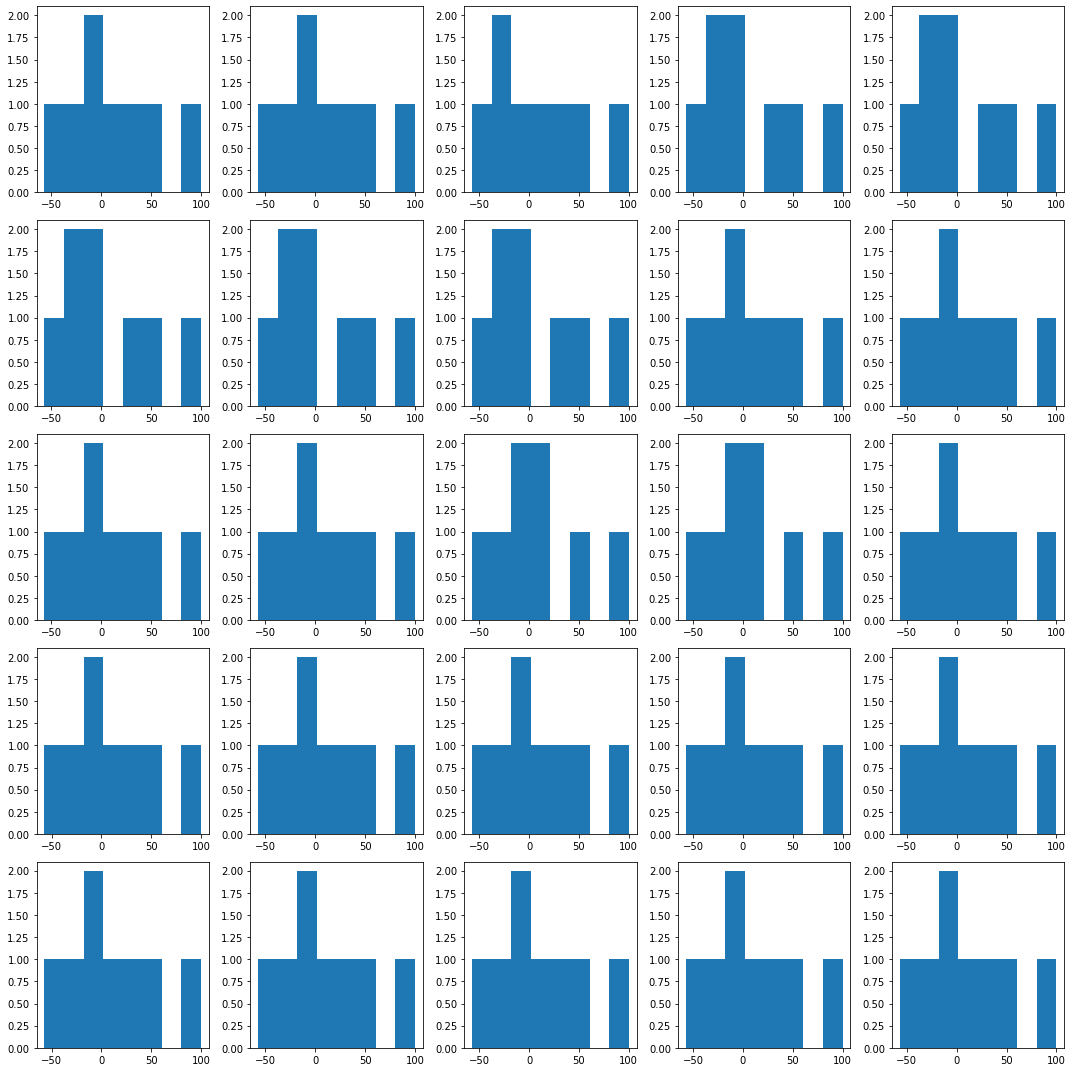

In [ ]:
clusterHistHeight = 5
clusterHistWidth = 5
indexListClusterSlope = -1
fig, ax = plt.subplots(clusterHistWidth, clusterHistHeight, tight_layout=True, figsize=(15,15))
for i in range(clusterHistHeight*clusterHistWidth):
    row = i // clusterHistHeight
    col = i % clusterHistHeight
    ax[row][col].hist(listClusterSlope[i], bins=NUM_OF_CLUSTERS)


[([-638.2222222222221, 930.4000000000001], [798.8888888888889, -405.99999999999994]), ([188.55555555555557, 188.44444444444446], [-999.0, 999.3333333333335]), ([-979.25, 714.857142857143], [65.5, 698.1428571428571]), ([976.9999999999999, -698.142857142857], [236.0, -714.8571428571429])]


"\nindexListClusterEnd += 1\nif indexListClusterEnd < NUM_OF_IMAGES:\n    for k in range(0, len(listClusterEndPoint[indexListClusterEnd]), 2): \n        ax[i][j].scatter(listClusterEndPoint[indexListClusterEnd][k][0], listClusterEndPoint[indexListClusterEnd][k][1], c = 'red')\n"

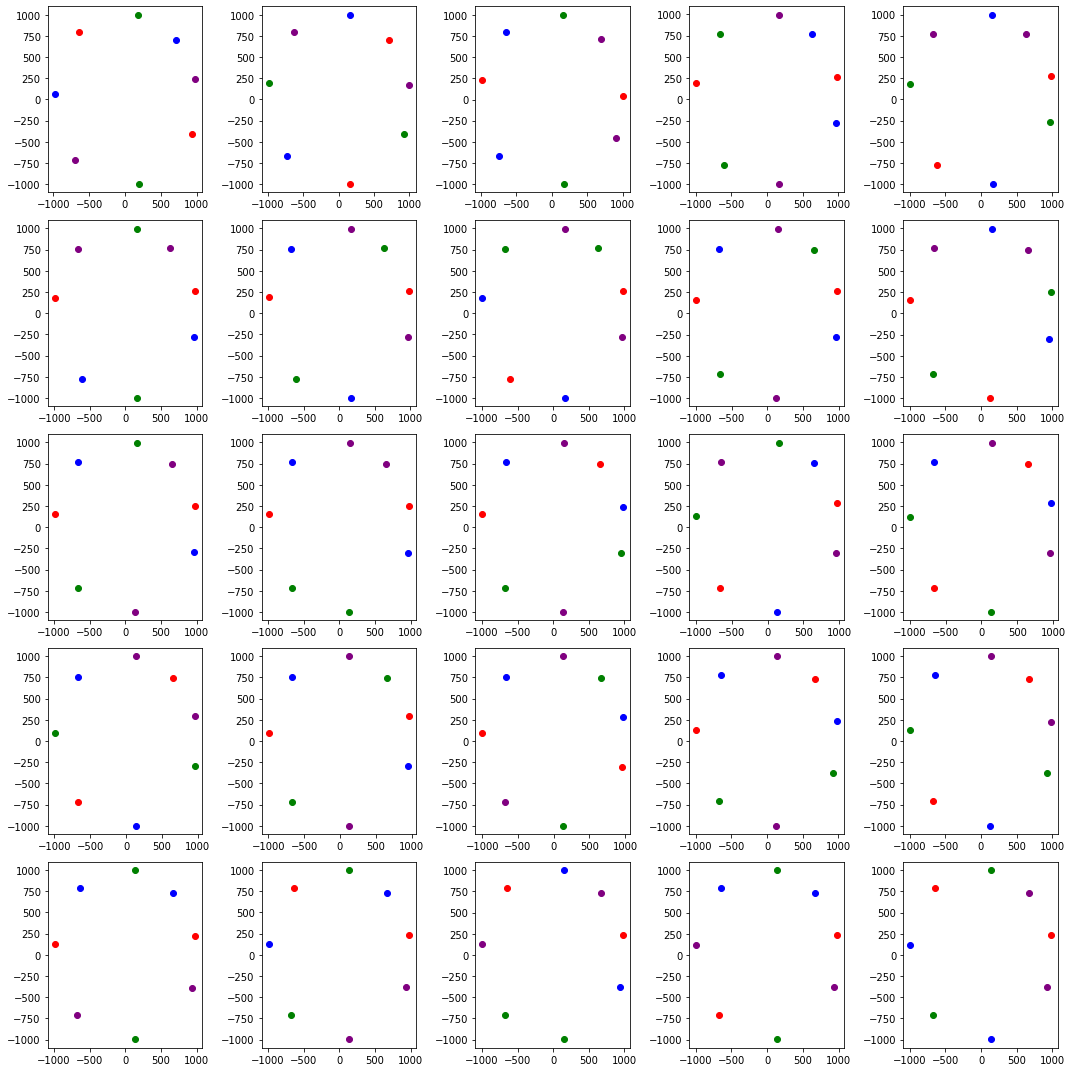

In [ ]:


indexListClusterEnd = -1

fig, ax = plt.subplots(clusterHistWidth, clusterHistHeight, tight_layout=True, figsize=(15,15))

for i in range(clusterHistHeight*clusterHistWidth):
    row = i // clusterHistHeight
    col = i % clusterHistHeight
    for j in range(len(coors_pair[i])):
        x, y = coors_pair[i][j]
        ax[row][col].scatter(x, y, c=listColorHex[j])
    
